In [5]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

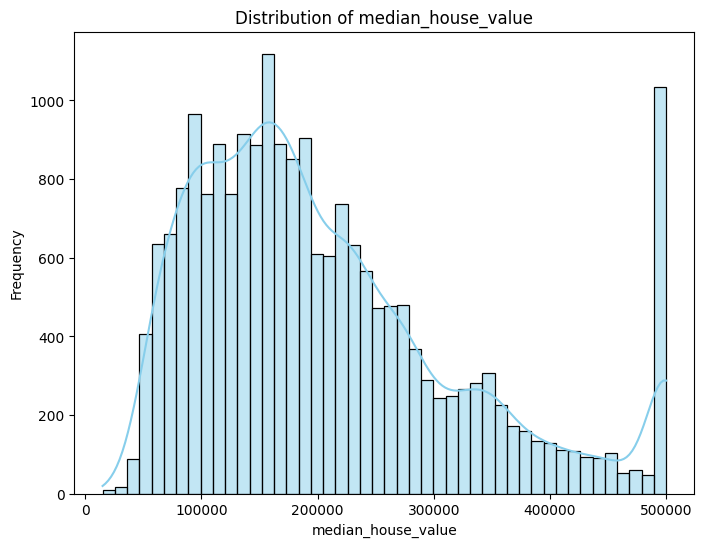

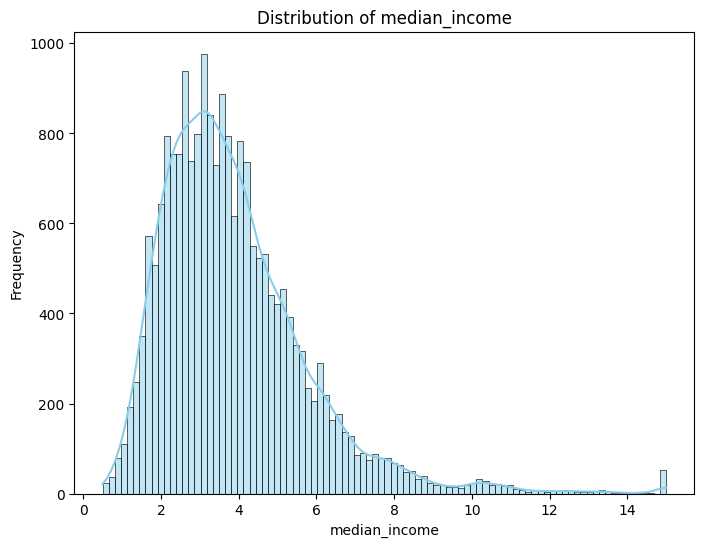

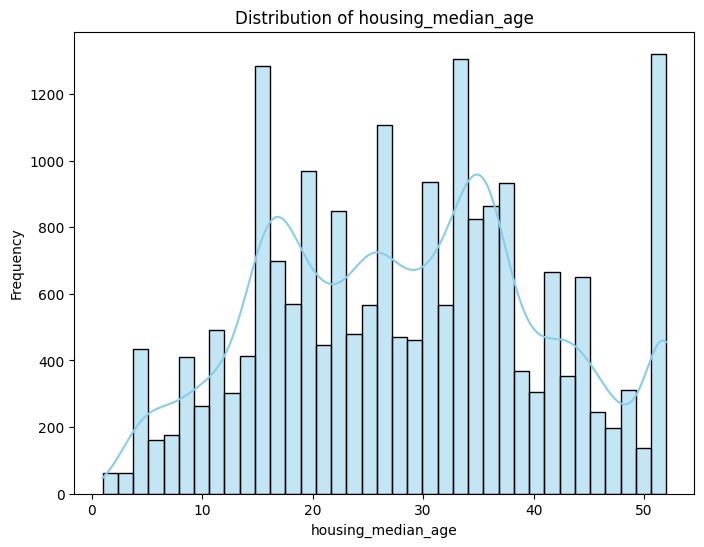

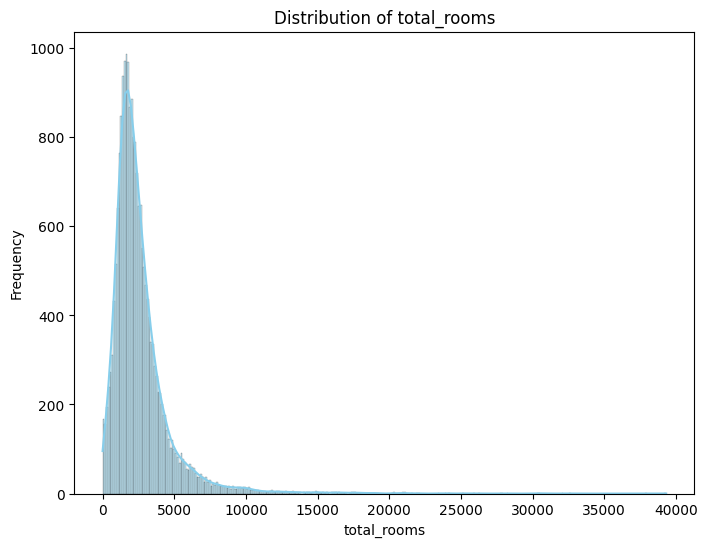

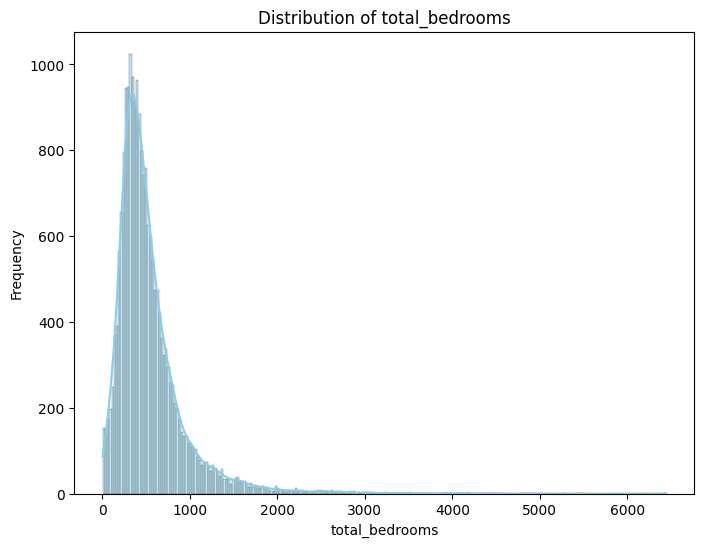

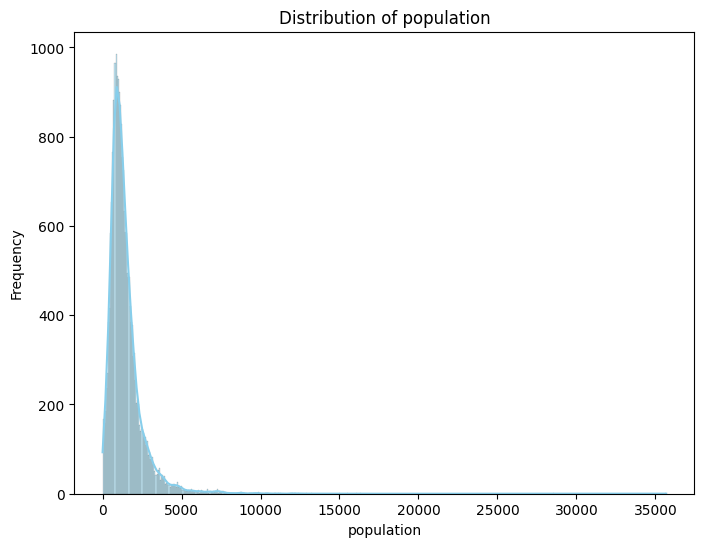

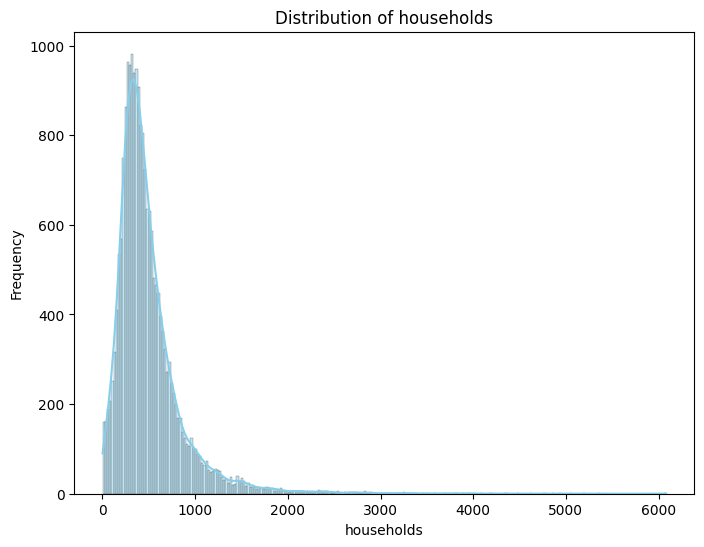

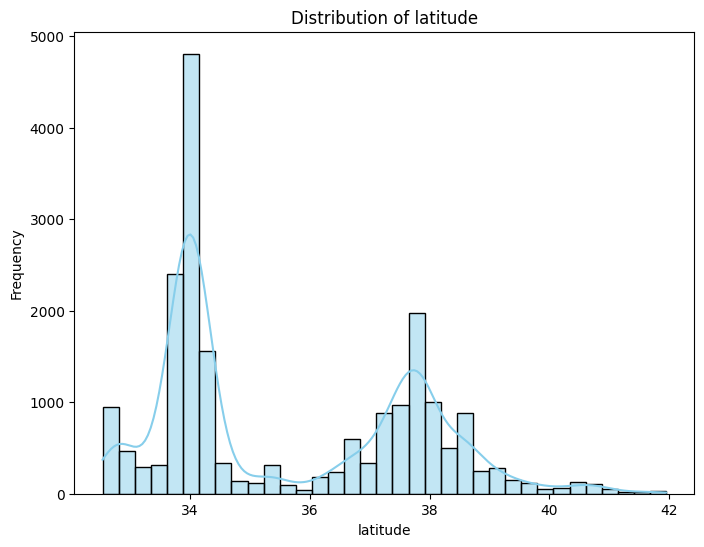

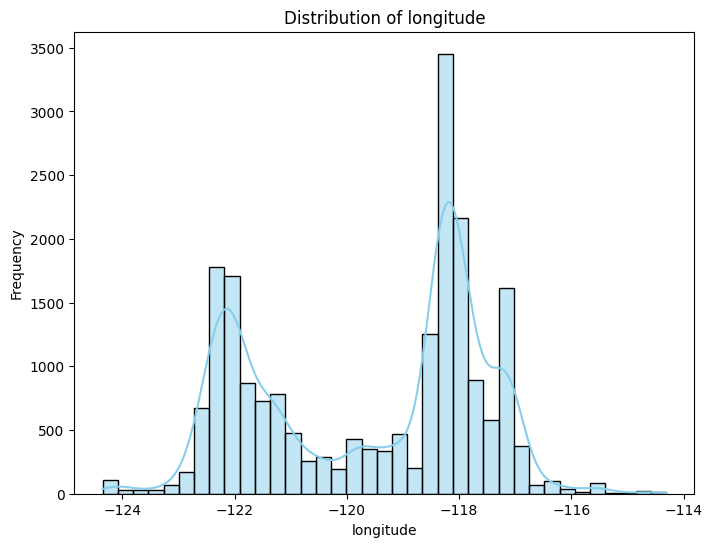

In [7]:
## distribution of each numeric colum
numeric_columns = houses.select_dtypes(include=[np.number])

# Plotting the distribution of numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(houses[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### plotting utility

In [10]:
## plotting utility

import matplotlib.pyplot as plt
import numpy as np
from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
    
    if type not in {'boxplot', 'dkeplot'}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4
    
    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)
    
    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1
        
    else:
    # general case of a 2D grid    
        i=j=0    
        for c in columns:
            print("column {c}".format(c=c))
            if type == 'boxplot':
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0


### Descriptive analytics: start by looking at raw statistics for the features in this dataset. what sort of story are they telling?

feel free to use the plot utility defined above

       median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   20640.000000        20640.000000  20640.000000   
mean        206855.816909       3.870671           28.639486   2635.763081   
std         115395.615874       1.899822           12.585558   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.563400           18.000000   1447.750000   
50%         179700.000000       3.534800           29.000000   2127.000000   
75%         264725.000000       4.743250           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1425.476744    499.539680     35.631861   -119.569704  
std        421.247906   1132.462122    382.329753      2.

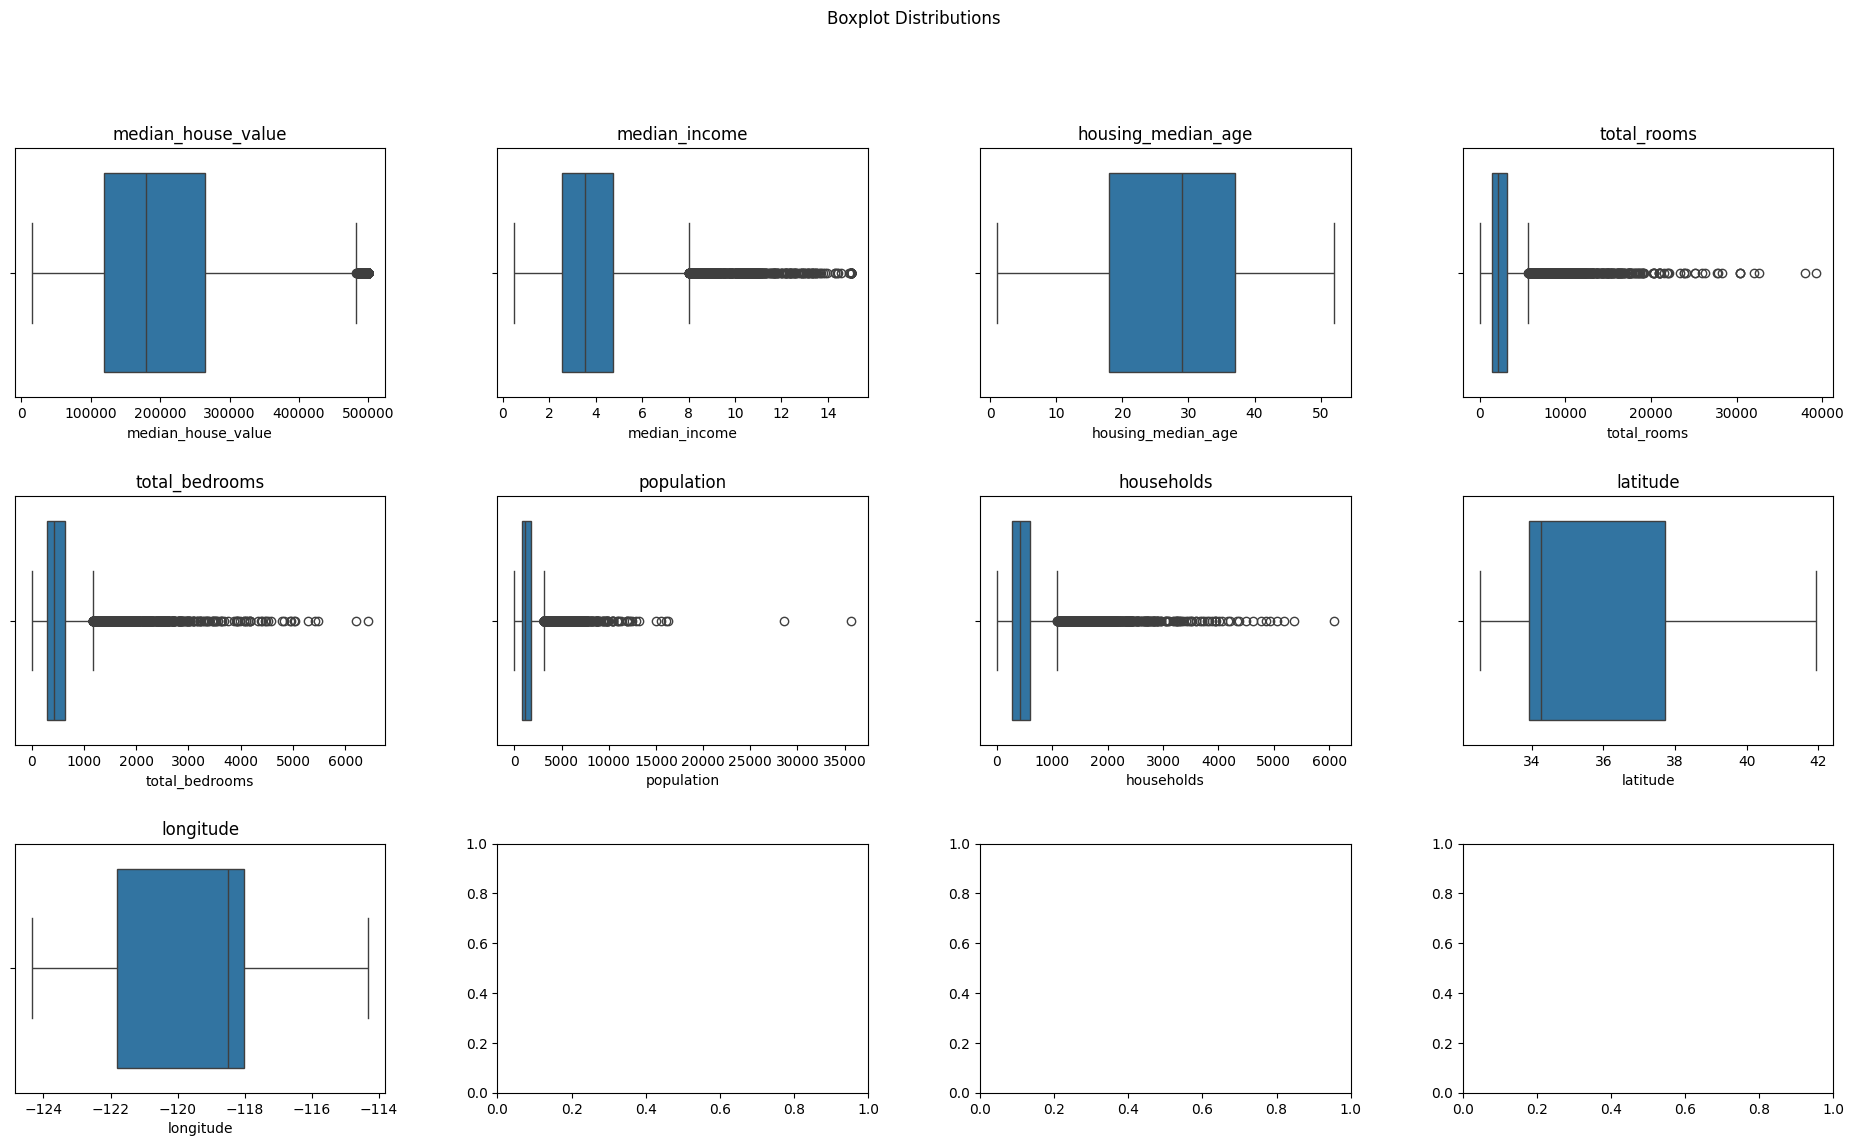

In [14]:
## your code here
# Function to describe the dataset and plot distributions
def describe_and_plot(data):
    # Describe statistics of the dataset
    print(data.describe())
    
    # Plot distributions using the provided utility
    plot_distributions(data, data.columns, type='boxplot', title='Boxplot Distributions')
    plot_distributions(data, data.columns, type='kdeplot', title='Kernel Density Estimation Distributions')

# Perform descriptive analytics and visualization
describe_and_plot(houses)

# The describe() function in Pandas computes summary statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for numerical columns in the dataset.
# This summary can help understand the range and distribution of the data, presence of outliers, and variations within each feature.

# After running this code, you'll see the computed statistics for each numerical column in the houses dataset, providing a preliminary understanding of the data's central tendencies and spread.
# Analyzing these statistics can reveal information about the dataset's story, including measures of dispersion, skewness, and general patterns within the features.

### feature normalisation 

Some of the features need to be normalised before any conclusion can be drawn

In [18]:
## normalising the features -- your code here
from sklearn.preprocessing import StandardScaler

# Assume `houses` is your DataFrame and you need to normalize all numeric features
numeric_columns = houses.select_dtypes(include=[np.number]).columns

# Initialize the StandardScaler
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
scaler = StandardScaler()

# Normalize the numeric columns in the dataframe
# The normalization process will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.
houses_normalized = houses.copy()
houses_normalized[numeric_columns] = scaler.fit_transform(houses[numeric_columns])

# Display the first few rows of the normalized dataframe
# This allows us to see the effect of normalization on the dataset.
print(houses_normalized.head())

# Check the mean and standard deviation of the normalized features
# After normalization, the means should be approximately zero and standard deviations should be close to one.
print("Mean of each feature after normalization:")
print(houses_normalized[numeric_columns].mean())
print("\nStandard Deviation of each feature after normalization:")
print(houses_normalized[numeric_columns].std())



# The houses_normalized DataFrame now contains the normalized values for numeric columns


   median_house_value  median_income  housing_median_age  total_rooms  \
0            2.129631       2.344766            0.982143    -0.804819   
1            1.314156       2.332238           -0.607019     2.045890   
2            1.258693       1.782699            1.856182    -0.535746   
3            1.165100       0.932968            1.856182    -0.624215   
4            1.172900      -0.012881            1.856182    -0.462404   

   total_bedrooms  population  households  latitude  longitude  
0       -0.970706   -0.974429   -0.977033  1.052548  -1.327835  
1        1.348649    0.861439    1.669961  1.043185  -1.322844  
2       -0.825895   -0.820777   -0.843637  1.038503  -1.332827  
3       -0.719067   -0.766028   -0.733781  1.038503  -1.337818  
4       -0.612239   -0.759847   -0.629157  1.038503  -1.337818  
Mean of each feature after normalization:
median_house_value   -9.363741e-17
median_income         6.058892e-17
housing_median_age    5.508083e-18
total_rooms           3.

### record identification

based on analysis of the normalised features, try and pinpoint specific records that may be outliers, and explain why

In [21]:
## your code here 
# Import necessary libraries
import pandas as pd
import numpy as np

# Assuming houses_normalized is your normalized DataFrame
# And numeric_columns contains the names of numeric columns

# Calculate the IQR for each numeric feature
Q1 = houses_normalized[numeric_columns].quantile(0.25)
Q3 = houses_normalized[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# Rows where any of the features are outside the interquartile range
outlier_rows_iqr = (houses_normalized[numeric_columns] < lower_bound) | (houses_normalized[numeric_columns] > upper_bound)

# Print information about outliers
for column in numeric_columns:
    outliers = houses_normalized[column][outlier_rows_iqr[column]]
    print(f"\n{column} - Outliers based on IQR method:")
    print(outliers)

    # Provide explanations
    print(f"Number of outliers in '{column}': {len(outliers)}")
    print(f"These records are outside the range of {lower_bound[column]} to {upper_bound[column]}, indicating potential anomalies.")

# Comment:
# The approach here is to identify outliers based on the normalized features of the dataset.
# Outliers are observations that are significantly different from other data points and can skew our analysis.
# We use the Interquartile Range (IQR) method to find these outliers.
# The IQR method identifies outliers as those points that fall below the 1st Quartile - 1.5*IQR or above the 3rd Quartile + 1.5*IQR.
# This method is effective in pinpointing unusual records, which could be due to data entry errors, exceptional cases, or other anomalies.
# Identifying outliers is crucial as they can affect the results of our data analysis and any predictive models we might build.
# After identifying outliers, we should examine these records closely to understand why they are different and decide how to handle them in our analysis.



median_house_value - Outliers based on IQR method:
89       2.540411
140      2.395679
459      2.540411
489      2.450275
493      2.540411
           ...   
20422    2.540411
20426    2.540411
20427    2.540411
20436    2.540411
20443    2.540411
Name: median_house_value, Length: 1071, dtype: float64
Number of outliers in 'median_house_value': 1071
These records are outside the range of -2.6426541602931506 to 2.3879881098845273, indicating potential anomalies.

median_income - Outliers based on IQR method:
0        2.344766
1        2.332238
131      4.069443
134      2.281442
135      2.384665
           ...   
20426    3.251189
20427    2.515681
20428    2.557212
20436    4.564396
20503    2.320289
Name: median_income, Length: 681, dtype: float64
Number of outliers in 'median_income': 681
These records are outside the range of -2.4092560063682757 to 2.180443727605425, indicating potential anomalies.

housing_median_age - Outliers based on IQR method:
Series([], Name: housing_media

have you completely solved the problem? how do we know for sure?

we may have removed too much (FP) or too little (FN). Can you suggest empirical validation of your findings?

Correlation between median house value and rooms per household: 0.15
Correlation between median house value and bedrooms per household: -0.05


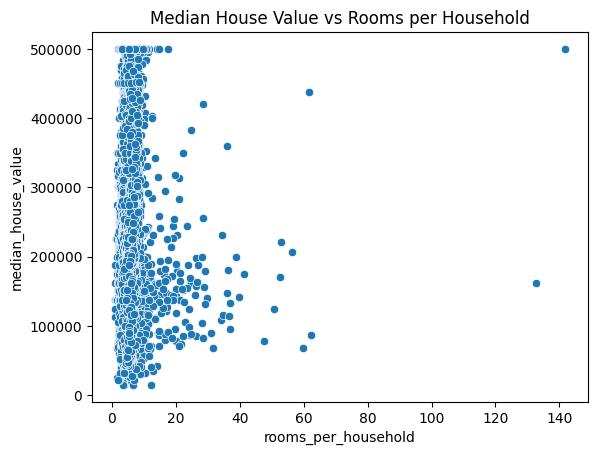

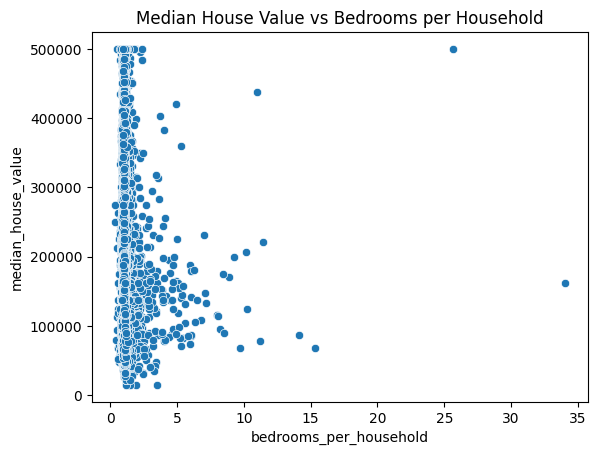

In [25]:
# Calculate correlations before outlier removal
import pandas as pd

#loading the dataset
houses_normalised_clean = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv')

# Calculate the new features if they don't already exist
if 'rooms_per_household' not in houses_normalised_clean.columns:
    houses_normalised_clean['rooms_per_household'] = houses_normalised_clean['total_rooms'] / houses_normalised_clean['households']

if 'bedrooms_per_household' not in houses_normalised_clean.columns:
    houses_normalised_clean['bedrooms_per_household'] = houses_normalised_clean['total_bedrooms'] / houses_normalised_clean['households']

# Now, calculate the correlations
corr1 = houses_normalised_clean['median_house_value'].corr(houses_normalised_clean['rooms_per_household'])
corr2 = houses_normalised_clean['median_house_value'].corr(houses_normalised_clean['bedrooms_per_household'])

# Print out the correlation coefficients
print(f"Correlation between median house value and rooms per household: {corr1:.2f}")
print(f"Correlation between median house value and bedrooms per household: {corr2:.2f}")

# To validate the presence of outliers, we will be plotting these relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for rooms per household
sns.scatterplot(data=houses_normalised_clean, x='rooms_per_household', y='median_house_value')
plt.title('Median House Value vs Rooms per Household')
plt.show()

# Plot for bedrooms per household
sns.scatterplot(data=houses_normalised_clean, x='bedrooms_per_household', y='median_house_value')
plt.title('Median House Value vs Bedrooms per Household')
plt.show()



it appears that house value is not strongly correlated with size, so probably location is a more relevant factor

## next, try using LOF and / or KNN and see if the results align with your empirical analysis

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [28]:
## your code here
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Initialize the LocalOutlierFactor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # You can adjust n_neighbors and contamination

# Fit the model and predict outliers
outliers_lof = lof.fit_predict(houses_normalized[numeric_columns])

# Get the indices of outlier rows (where LOF value is -1)
outlier_indices = np.where(outliers_lof == -1)[0]

# Extract outlier records from the DataFrame
outliers_df_lof = houses_normalized.iloc[outlier_indices]

# Print or analyze the outlier records
print("Outliers based on LOF method:")
print(outliers_df_lof)

# Provide explanations and additional analysis for outliers
for column in numeric_columns:
    outliers = outliers_df_lof[column]
    print(f"\nOutliers based on LOF method in '{column}':")
    print(outliers)
    
    # Explanation for outliers in each column
    print(f"Number of outliers in '{column}': {len(outliers)}")
    print(f"These records are considered outliers by the LOF method, indicating potential anomalies in '{column}'.")



Outliers based on LOF method:
       median_house_value  median_income  housing_median_age  total_rooms  \
48              -0.167738      -1.537061            0.902685    -0.922166   
59              -1.272660      -0.688592           -2.116722    -1.135775   
61              -1.142669       1.183102            1.617807    -1.146317   
69              -0.672969      -1.521480            1.379433     0.075742   
73              -1.207665      -1.774299            1.379433    -1.202699   
...                   ...            ...                 ...          ...   
20543           -0.210202      -1.126223            0.346478     1.936794   
20574           -0.113142      -1.020105           -1.481058    -0.603129   
20578            0.590541      -0.535048            0.664310    -1.046847   
20588           -1.261394      -0.959730           -1.878348    -0.327180   
20629           -0.854090      -0.935042           -0.050812     3.391715   

       total_bedrooms  population  households

## Your overall conclusions here

In [ ]:
# The comparison shows that each method has its strengths and limitations.
# The IQR method is straightforward and effective for standard distributions but may miss subtleties in complex datasets.
# In contrast, LOF provides a more detailed analysis, sensitive to local data structures, making it suitable for datasets with intricate patterns and relationships.
# Both methods have identified different sets of indices as outliers, which is common since they use different criteria and calculations to determine what is considered an outlier.
# The choice between these methods depends on the specific requirements of your analysis and the nature of your data.